In [1]:
# loading the required libraries 
#Load required libraries
import os
import csv
import tweepy
from tweepy import OAuthHandler
from tweepy import Stream
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# from textblob.sentiments import NaiveBayesAnalyzer
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
stop_words = STOP_WORDS
import string
punctuations = string.punctuation
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.base import TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#set working directory
os.chdir("C:/Users/admin/Documents/Python Files")
os.getcwd()

'C:\\Users\\admin\\Documents\\Python Files'

In [35]:
## Connect Twitter

#Store required keys
consumer_key = "9geIDwOzVdbm0dCuAiUpzCUnu"
consumer_secret = "TzkfViMc6bDdK2FILQ8xTVCG82qjn0FhUdvsJGzlQ79J0EG3SR"
access_key = "1541025487-DeXUlBh0Oo76u5NWW4j7iPejrTlRbw3A3Q2zMU0"
access_secret = "J0H68P6Zgmx7tcQfEL0qjDVgsTXsPTGeRml04cbk233jp"

In [4]:
#Establish connection
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

##### 	We have extracted tweets by below trending Hastags
1. 	#BTSWORLD
-Tweet count: 500
2. 	#PAKvNZ
-Tweet count: 500
3. 	#GOT7onTodayShow
-Tweet count: 500

In [16]:
#Extract tweets
#Create empty list
results = []
trending_hastags = ['#BTSWORLD','#PAKvNZ','#GOT7onTodayShow']
for i in trending_hastags:
    #Get the first 500 items based on the search query
    for tweet in tweepy.Cursor(api.search,q=i,lang="en").items(500):
        results.append(tweet)

In [17]:
# Verify the number of items returned
print (len(results))

1500


In [19]:
#Pass the tweets list to the above function to create a DataFrame
DataSet = toDataFrame(results)

In [21]:
DataSet.head(5)

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetSource,tweetCreated,userID,userScreen,userName,userCreateDt,userDesc,userFollowerCt,userFriendsCt,userLocation,userTimezone
0,1143919690743341056,RT @softwhoseok: me explaining to namjoon and ...,169,0,Twitter for Android,2019-06-26 16:31:21,192224155,owenthesaintss,✨ hope right here✨,2010-09-18 14:48:44,FUCK your zodiac sign what’s your name what ex...,547,421,,None
1,1143919690718334976,RT @agustshoongi: Me before #BTSWORLD: any one...,389,0,Twitter for Android,2019-06-26 16:31:21,1141749496755499011,reveluv_exe,Gabi$ 🤡 #ATEEZ2ndWin ಥ‿ಥ,2019-06-20 16:47:47,to__##JIMINIE : I will be your manager on bts ...,20,55,was created 20/06/19,None
2,1143919690407956483,RT @guroderes: i drew my personal interpretati...,3785,0,Twitter for iPhone,2019-06-26 16:31:21,3234322494,whozhaechann,ThaYsPetAcuLaR Viu o jk voando 25/05,2015-06-02 23:45:29,If teardrops could be bottled? 🥀{fã account} @...,7169,7142,"Rio de Janeiro, Brasil",None
3,1143919689786990594,RT @btsworIdwide: #BTSWORLD Update:\n\nARMY: a...,263,0,Twitter Web App,2019-06-26 16:31:21,1127776211214655489,chilachiara,Chila,2019-05-13 03:22:56,I dont care,4,17,,None
4,1143919689619398656,RT @sugasaward: Me chasing seokjin to audition...,1217,0,Twitter Web App,2019-06-26 16:31:21,1113918609275990016,LeilaXBangtan,Leila🔥,2019-04-04 21:37:46,,716,4442,,None


In [23]:
DataSet.to_csv('tweeterDataset.csv')

In [56]:
#Load Text data
df = pd.read_csv("tweeterDataset.csv")

In [57]:
df.columns

Index(['Unnamed: 0', 'tweetID', 'tweetText', 'tweetRetweetCt',
       'tweetFavoriteCt', 'tweetSource', 'tweetCreated', 'userID',
       'userScreen', 'userName', 'userCreateDt', 'userDesc', 'userFollowerCt',
       'userFriendsCt', 'userLocation', 'userTimezone'],
      dtype='object')

In [58]:
# let's remove the features which are not required 
df = df.drop(['Unnamed: 0', 'tweetID', 'tweetSource', 'tweetCreated', 'userID',
       'userScreen', 'userName', 'userCreateDt', 'userDesc', 'userLocation', 'userTimezone'],axis = 1)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
tweetText          1500 non-null object
tweetRetweetCt     1500 non-null int64
tweetFavoriteCt    1500 non-null int64
userFollowerCt     1500 non-null int64
userFriendsCt      1500 non-null int64
dtypes: int64(4), object(1)
memory usage: 58.7+ KB


In [60]:
df.describe()

,tweetRetweetCt,tweetFavoriteCt,userFollowerCt,userFriendsCt
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,2148.734000,0.340667,1677.151333,615.463333
std,4266.458223,1.497367,17447.844231,1624.323517
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,44.750000,95.000000
50%,186.000000,0.000000,179.000000,245.000000
75%,2832.250000,0.000000,576.750000,583.750000
max,21970.000000,30.000000,600867.000000,41975.000000


###### let' feature engineer features like : 
- Length of tweet (1 to 140 characters) 
- Average word length in tweet 
- Number of #hashtags 
- Number of @mentions 
- Number of links  

In [61]:
def length_of_tweet(tweet):
    return len(tweet)

In [62]:
def avg_len(length):
    return length/sum(df['length_of_tweet'])

In [63]:
def num_hastags(tweet):
    count = 0
    words = tweet.split()
    for word in words:
        if word[:1] == '#' and len(word)>1:
            count+=1
    return count

In [64]:
def num_mentions(tweet):
    words = tweet.split()
    count = 0
    for word in words:
        if word[:1] == '@' and len(word)>1:
            count+=1
    return count

In [65]:
def num_links(tweet):
    words = tweet.split()
    count = 0
    for word in words:
        if word[:5] == 'https' and len(word)>5:
            count+=1
    return count

In [66]:
df['num_links'] = df['tweetText'].apply(num_links)
df['num_mentions'] = df['tweetText'].apply(num_mentions)
df['num_hastags'] = df['tweetText'].apply(num_hastags)
df['length_of_tweet'] = df['tweetText'].apply(length_of_tweet)
df['avg_len'] = df['length_of_tweet'].apply(avg_len)

In [67]:
df.head()

,tweetText,tweetRetweetCt,tweetFavoriteCt,userFollowerCt,userFriendsCt,num_links,num_mentions,num_hastags,length_of_tweet,avg_len
0,RT @softwhoseok: me explaining to namjoon and ...,169,0,547,421,1,1,1,140,0.000791
1,RT @agustshoongi: Me before #BTSWORLD: any one...,389,0,20,55,0,1,1,140,0.000791
2,RT @guroderes: i drew my personal interpretati...,3785,0,7169,7142,1,1,2,121,0.000684
3,RT @btsworIdwide: #BTSWORLD Update:\n\nARMY: a...,263,0,4,17,0,1,2,140,0.000791
4,RT @sugasaward: Me chasing seokjin to audition...,1217,0,716,4442,1,1,1,93,0.000525


In [68]:
df.describe()

,tweetRetweetCt,tweetFavoriteCt,userFollowerCt,userFriendsCt,num_links,num_mentions,num_hastags,length_of_tweet,avg_len
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,2148.734000,0.340667,1677.151333,615.463333,0.485333,1.090667,1.922000,117.985333,0.000667
std,4266.458223,1.497367,17447.844231,1624.323517,0.506579,0.737660,1.717134,30.023958,0.000170
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.000000,0.000090
25%,1.000000,0.000000,44.750000,95.000000,0.000000,1.000000,1.000000,100.000000,0.000565
50%,186.000000,0.000000,179.000000,245.000000,0.000000,1.000000,1.000000,139.000000,0.000785
75%,2832.250000,0.000000,576.750000,583.750000,1.000000,2.000000,3.000000,140.000000,0.000791
max,21970.000000,30.000000,600867.000000,41975.000000,2.000000,6.000000,8.000000,146.000000,0.000825


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
tweetText          1500 non-null object
tweetRetweetCt     1500 non-null int64
tweetFavoriteCt    1500 non-null int64
userFollowerCt     1500 non-null int64
userFriendsCt      1500 non-null int64
num_links          1500 non-null int64
num_mentions       1500 non-null int64
num_hastags        1500 non-null int64
length_of_tweet    1500 non-null int64
avg_len            1500 non-null float64
dtypes: float64(1), int64(8), object(1)
memory usage: 117.3+ KB


In [70]:
df.fillna(0, inplace=True)

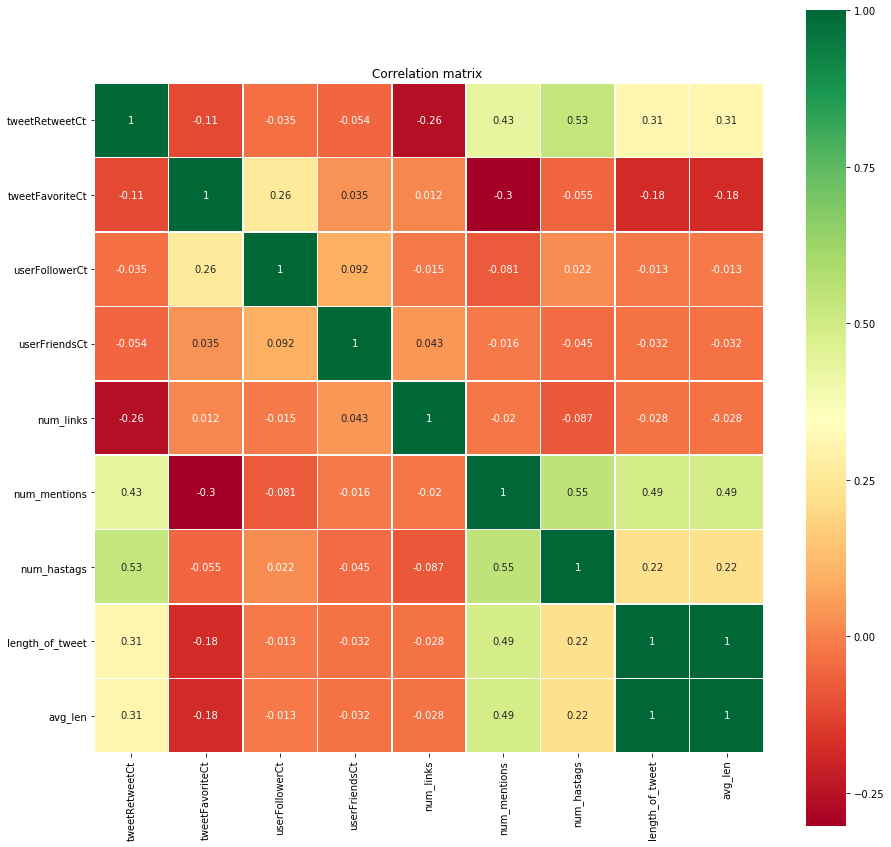

In [71]:
# heatmap using correlation matrix
plt.figure(figsize=(15,15))
_ = sns.heatmap(df[['tweetRetweetCt','tweetFavoriteCt','userFollowerCt','userFriendsCt','num_links','num_mentions','num_hastags','length_of_tweet','avg_len']].corr(), square=True, cmap='RdYlGn',linewidths=0.5,linecolor='w',annot=True)
plt.title('Correlation matrix ')
# plt.savefig('correlation.png')
plt.show()

In [72]:
df = df.drop(['length_of_tweet'],axis = 1)

In [73]:
df.head()

,tweetText,tweetRetweetCt,tweetFavoriteCt,userFollowerCt,userFriendsCt,num_links,num_mentions,num_hastags,avg_len
0,RT @softwhoseok: me explaining to namjoon and ...,169,0,547,421,1,1,1,0.000791
1,RT @agustshoongi: Me before #BTSWORLD: any one...,389,0,20,55,0,1,1,0.000791
2,RT @guroderes: i drew my personal interpretati...,3785,0,7169,7142,1,1,2,0.000684
3,RT @btsworIdwide: #BTSWORLD Update:\n\nARMY: a...,263,0,4,17,0,1,2,0.000791
4,RT @sugasaward: Me chasing seokjin to audition...,1217,0,716,4442,1,1,1,0.000525


In [74]:
df['score'] = df['tweetRetweetCt']+df['tweetFavoriteCt']+df['userFollowerCt']+df['userFriendsCt']+df['num_links']+df['num_mentions']+df['num_hastags']+df['avg_len']

In [75]:
# Normalizing score values in range 0 to 100
df['score'] = (df['score'] - min(df['score']))/(max(df['score']) - min(df['score']))*100

In [76]:
df.head()

,tweetText,tweetRetweetCt,tweetFavoriteCt,userFollowerCt,userFriendsCt,num_links,num_mentions,num_hastags,avg_len,score
0,RT @softwhoseok: me explaining to namjoon and ...,169,0,547,421,1,1,1,0.000791,0.189388
1,RT @agustshoongi: Me before #BTSWORLD: any one...,389,0,20,55,0,1,1,0.000791,0.077220
2,RT @guroderes: i drew my personal interpretati...,3785,0,7169,7142,1,1,2,0.000684,3.011906
3,RT @btsworIdwide: #BTSWORLD Update:\n\nARMY: a...,263,0,4,17,0,1,2,0.000791,0.047430
4,RT @sugasaward: Me chasing seokjin to audition...,1217,0,716,4442,1,1,1,0.000525,1.061107


In [77]:
df.describe()

,tweetRetweetCt,tweetFavoriteCt,userFollowerCt,userFriendsCt,num_links,num_mentions,num_hastags,avg_len,score
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,2148.734000,0.340667,1677.151333,615.463333,0.485333,1.090667,1.922000,0.000667,0.739444
std,4266.458223,1.497367,17447.844231,1624.323517,0.506579,0.737660,1.717134,0.000170,2.998038
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000090,0.000000
25%,1.000000,0.000000,44.750000,95.000000,0.000000,1.000000,1.000000,0.000565,0.076180
50%,186.000000,0.000000,179.000000,245.000000,0.000000,1.000000,1.000000,0.000785,0.240896
75%,2832.250000,0.000000,576.750000,583.750000,1.000000,2.000000,3.000000,0.000791,0.704173
max,21970.000000,30.000000,600867.000000,41975.000000,2.000000,6.000000,8.000000,0.000825,100.000000


In [78]:
df.drop(df.columns.difference(['tweetText','score']), 1, inplace=True)

In [79]:
df.head()

,tweetText,score
0,RT @softwhoseok: me explaining to namjoon and ...,0.189388
1,RT @agustshoongi: Me before #BTSWORLD: any one...,0.077220
2,RT @guroderes: i drew my personal interpretati...,3.011906
3,RT @btsworIdwide: #BTSWORLD Update:\n\nARMY: a...,0.047430
4,RT @sugasaward: Me chasing seokjin to audition...,1.061107


In [80]:
# create the nlp object using Spacy's English language class
nlp = English()

In [81]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = nlp(sentence)

    # here the token is converted into lowercase if it is a Pronoun and if it is not a Pronoun then it is lemmatized and lowercased    
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words using stopword from spacy library and punctuations from string library
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [82]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [83]:
# bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))
# Creating the Bag of Words model
bow_vector = CountVectorizer(max_features = 100,tokenizer = spacy_tokenizer,ngram_range=(1,2))
# X = bow_vector.fit_transform(train.loc[:,'Title']).toarray()

# Separating labels and features

In [84]:
X = df.drop('score',axis=1).values
y = df['score'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
print(df.shape, X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(1500, 2) (1125, 1) (375, 1) (1125,) (375,)


In [85]:
X_train = X_train.ravel()

In [86]:
X_train.shape

(1125,)

In [87]:
X_test = X_test.ravel()

In [88]:
X_test.shape

(375,)

In [89]:
y_train.shape

(1125,)

In [90]:
X_train

array(['Sheer class! Congratulations @babarazam258 🔥\n\n#PAKvNZ #CWC19 https://t.co/zdmwSV9cZO',
       "RT @GOT7Official: GOT7 2019 WORLD TOUR 'KEEP SPINNING' IN NEWARK\n\nGOT7 NOW @TODAYshow\n\n#GOT7 #갓세븐\n#GOT7_SPINNINGTOP\n#GOT7_ECLIPSE\n#GOT7WORL…",
       "RT @GOT7Official: GOT7 2019 WORLD TOUR 'KEEP SPINNING' IN NEWARK\n: WITH @TODAYshow\n\nhttps://t.co/w0yf6rsUIe\n\n#GOT7 #갓세븐\n#GOT7_SPINNINGTOP\n#…",
       ...,
       'Next: M Santner\nPAK 89/2 21.1 Ov\nNZ 237/6 50.0 Ov\nB Azam 36(44), M Hafeez 24(44)\n149 runs required from 173 balls… https://t.co/txa53Y8PUG',
       "RT @GOT7Community: #GOT7 #GOT7onTodayShow #갓세븐 #GOT7WORLDTOUR #GOT7_KEEPSPINNING\n\nPerformance in all English, LIVE.\n\nI'm so proud of the bo…",
       "RT @GOT7Official: GOT7 2019 WORLD TOUR 'KEEP SPINNING' IN NEWARK\n: WITH @TODAYshow\n\nhttps://t.co/w0yf6rsUIe\n\n#GOT7 #갓세븐\n#GOT7_SPINNINGTOP\n#…"],
      dtype=object)

In [91]:
xgboost = XGBRegressor()

In [92]:
# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('tfidf',TfidfTransformer()),
                 ('regressor', xgboost)])

# model generation
pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('cleaner', <__main__.predictors object at 0x000002636E20F2E8>), ('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=100, min_df=1,
       ...lpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1))])

In [93]:
pred = pipe.predict(X_test)